In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [2]:
df1=pd.read_csv('train (1).csv')

In [3]:
df2 = df1

In [4]:
df2.shape

(20580, 6)

In [5]:
df2.head(10)

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0
5,6,NaN,Afghanistan,2020-01-27,0.0,0.0
6,7,NaN,Afghanistan,2020-01-28,0.0,0.0
7,8,NaN,Afghanistan,2020-01-29,0.0,0.0
8,9,NaN,Afghanistan,2020-01-30,0.0,0.0
9,10,NaN,Afghanistan,2020-01-31,0.0,0.0


In [6]:
df2.columns

Index(['Id', 'Province_State', 'Country_Region', 'Date', 'ConfirmedCases',
       'Fatalities'],
      dtype='object')

In [7]:
df2.describe()

,Id,ConfirmedCases,Fatalities
count,20580.000000,20580.000000,20580.000000
mean,14685.500000,514.939116,21.080952
std,8487.230117,4541.261768,287.758197
min,1.000000,0.000000,0.000000
25%,7335.750000,0.000000,0.000000
50%,14685.500000,0.000000,0.000000
75%,22035.250000,35.000000,0.000000
max,29370.000000,105792.000000,12428.000000


In [8]:
df2.columns = ['Id', 'Province_State', 'Country', 'Date', 'Confirmed_Cases',
       'Fatalities']

In [9]:
df2.columns

Index(['Id', 'Province_State', 'Country', 'Date', 'Confirmed_Cases',
       'Fatalities'],
      dtype='object')

In [10]:
df2.isnull().sum()

Id                     0
Province_State     11830
Country                0
Date                   0
Confirmed_Cases        0
Fatalities             0
dtype: int64

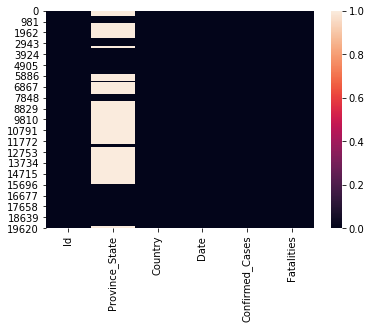

In [11]:
sns.heatmap(df2.isnull())

In [12]:
df2.drop('Province_State', axis=1,inplace=True)

In [13]:
df2.head(3)

,Id,Country,Date,Confirmed_Cases,Fatalities
0,1,Afghanistan,2020-01-22,0.0,0.0
1,2,Afghanistan,2020-01-23,0.0,0.0
2,3,Afghanistan,2020-01-24,0.0,0.0


In [14]:
a=df2['Country'].value_counts()[:20]
b=a.index
a

US                                  3780
China                               2310
Canada                               700
France                               700
Australia                            560
United Kingdom                       490
Netherlands                          280
Denmark                              210
Cyprus                                70
Diamond Princess                      70
Norway                                70
Saint Vincent and the Grenadines      70
Austria                               70
Saint Lucia                           70
Guinea-Bissau                         70
Egypt                                 70
Gambia                                70
Philippines                           70
Mauritius                             70
Nepal                                 70
Name: Country, dtype: int64

In [15]:
b

Index(['US', 'China', 'Canada', 'France', 'Australia', 'United Kingdom',
       'Netherlands', 'Denmark', 'Cyprus', 'Diamond Princess', 'Norway',
       'Saint Vincent and the Grenadines', 'Austria', 'Saint Lucia',
       'Guinea-Bissau', 'Egypt', 'Gambia', 'Philippines', 'Mauritius',
       'Nepal'],
      dtype='object')

In [16]:
covid_countries = list(b)
type(covid_countries)

list

In [17]:
# conf_us=df2.loc[df2['Country'] == 'Kenya', 'Confirmed_Cases'].groupby(['Date'])
# death_us=df2.loc[df2['Country'] == 'Kenya', 'Fatalities'].sum()
# print(conf_us)
# print(death_us)

In [18]:
d_lis=[]
c_lis2=[]
for i in covid_countries:
    
    conf_=df2.loc[df2['Country'] == i, 'Confirmed_Cases'].sum()
    death_=df2.loc[df2['Country'] == i, 'Fatalities'].sum()
    
    d_lis.append(int(death_))
    c_lis2.append(int(conf_))


In [19]:
c_lis2

[1082264,
 4186795,
 52048,
 410812,
 36148,
 165706,
 102018,
 32727,
 2089,
 32044,
 51471,
 18,
 84821,
 66,
 26,
 7156,
 35,
 11535,
 841,
 92]

Text(0, 0.5, 'Total No. of cases of COVID-19')

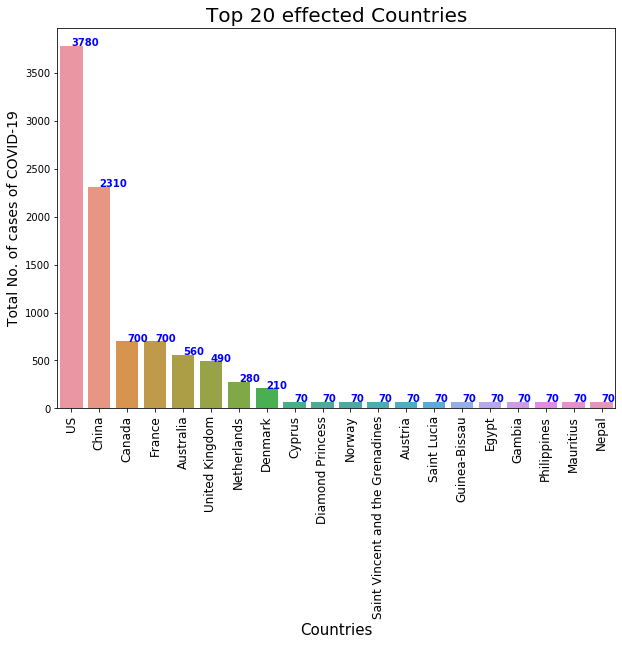

In [20]:
plt.figure(figsize=(10,7))
for i,v in enumerate(a):
    plt.text(i,v,v, color='blue', fontweight='bold')
sns.barplot(x=a.index,y=a,orient='v')
plt.xticks(rotation=90,fontsize=12,)
plt.title('Top 20 effected Countries',fontsize=20)
plt.xlabel('Countries',fontsize=15)
plt.ylabel('Total No. of cases of COVID-19',fontsize=14)

In [21]:
data = {'Country':['US', 'China', 'France', 'Canada', 'Australia', 'United Kingdom',
       'Netherlands', 'Denmark', 'Armenia', 'Monaco', 'Cyprus', 'Poland',
       'Haiti', 'Ecuador', 'Central African Republic', 'Oman', 'Uganda',
       'Austria', 'Djibouti', 'El Salvador'], 'Cases':[3780,2310,700,700,560,490,280,210,70,70,70,70,70,70,70,70,70,70,70,70],
        'Casualties':c_lis2, 'Death':d_lis}
df = pd.DataFrame(data)
df

,Country,Cases,Casualties,Death
0,US,3780,1082264,18071
1,China,2310,4186795,145794
2,France,700,52048,554
3,Canada,700,410812,21349
4,Australia,560,36148,190
5,United Kingdom,490,165706,9122
6,Netherlands,280,102018,5837
7,Denmark,210,32727,542
8,Armenia,70,2089,41
9,Monaco,70,32044,269


In [22]:
df.columns

Index(['Country', 'Cases', 'Casualties', 'Death'], dtype='object')

In [23]:
x = df[['Casualties', 'Death']]

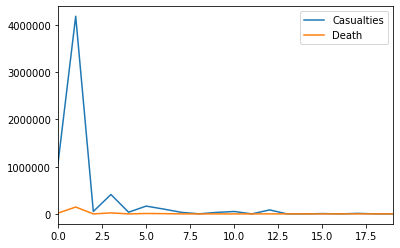

In [24]:
x.plot()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

<Figure size 720x504 with 0 Axes>

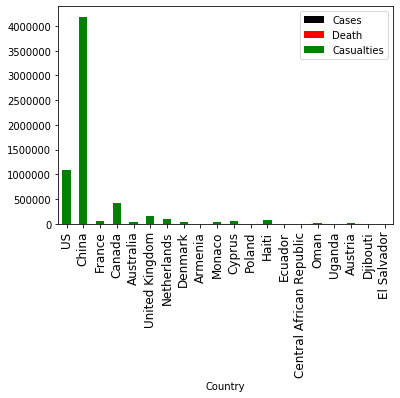

In [25]:
plt.figure(figsize=(10,7))
ax = df.plot(x='Country',y='Cases', kind='bar', color='black')
df.plot(x="Country", y="Death", kind="bar", ax=ax, color='r' )
df.plot(x="Country", y="Casualties", kind="bar", ax=ax, color='g')
plt.xticks(rotation=90,fontsize=12)

<Figure size 720x504 with 0 Axes>

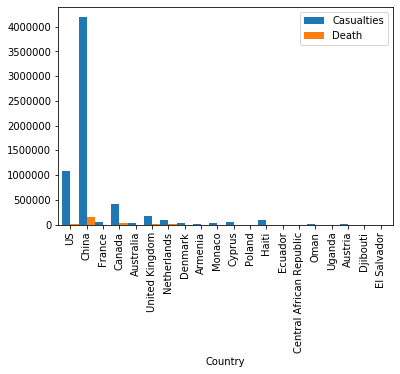

In [26]:
plt.figure(figsize=(10,7))
ax = df.plot(x='Country',y=['Casualties','Death'], kind='bar',width=1)

In [27]:
df

,Country,Cases,Casualties,Death
0,US,3780,1082264,18071
1,China,2310,4186795,145794
2,France,700,52048,554
3,Canada,700,410812,21349
4,Australia,560,36148,190
5,United Kingdom,490,165706,9122
6,Netherlands,280,102018,5837
7,Denmark,210,32727,542
8,Armenia,70,2089,41
9,Monaco,70,32044,269


In [28]:
df2.head()

,Id,Country,Date,Confirmed_Cases,Fatalities
0,1,Afghanistan,2020-01-22,0.0,0.0
1,2,Afghanistan,2020-01-23,0.0,0.0
2,3,Afghanistan,2020-01-24,0.0,0.0
3,4,Afghanistan,2020-01-25,0.0,0.0
4,5,Afghanistan,2020-01-26,0.0,0.0


# Country wise confirmed and Fatalities/Death cases plotting

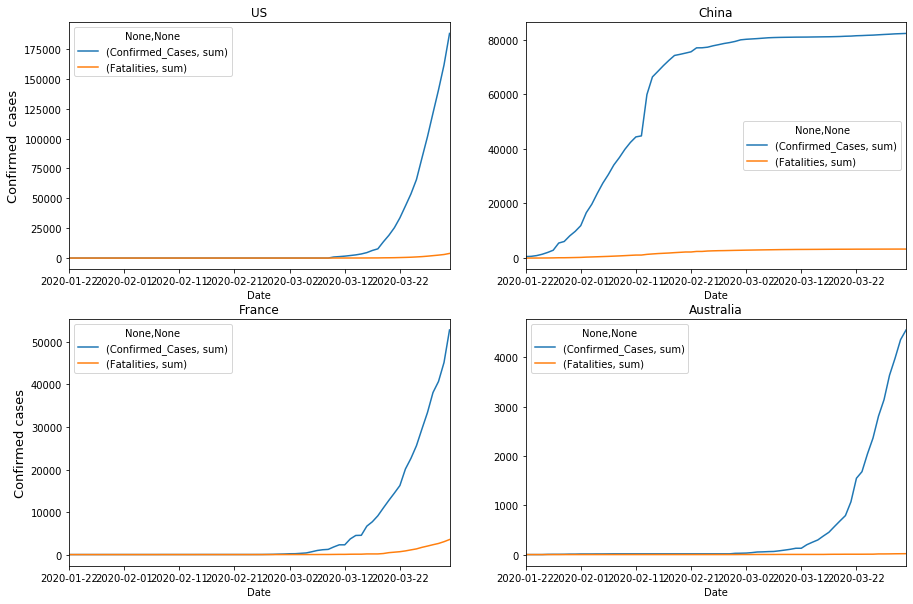

In [29]:
#US
ConfirmedCases_date_US = df2[df2['Country']=='US'].groupby(['Date']).agg({'Confirmed_Cases':['sum']})
fatalities_date_US = df2[df2['Country']=='US'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_US = ConfirmedCases_date_US.join(fatalities_date_US)


#China
ConfirmedCases_date_China = df2[df2['Country']=='China'].groupby(['Date']).agg({'Confirmed_Cases':['sum']})
fatalities_date_China = df2[df2['Country']=='China'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_China = ConfirmedCases_date_China.join(fatalities_date_China)

#France
ConfirmedCases_date_France = df2[df2['Country']=='France'].groupby(['Date']).agg({'Confirmed_Cases':['sum']})
fatalities_date_France = df2[df2['Country']=='France'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_France = ConfirmedCases_date_France.join(fatalities_date_France)
#Australia
ConfirmedCases_date_Australia = df2[df2['Country']=='Australia'].groupby(['Date']).agg({'Confirmed_Cases':['sum']})
fatalities_date_Australia = df2[df2['Country']=='Australia'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Australia = ConfirmedCases_date_Australia.join(fatalities_date_Australia)



plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_US.plot(ax=plt.gca(), title='US')
plt.ylabel("Confirmed  cases", size=13)

plt.subplot(2, 2, 2)
total_date_China.plot(ax=plt.gca(), title='China')

plt.subplot(2, 2, 3)
total_date_France.plot(ax=plt.gca(), title='France')
plt.ylabel("Confirmed cases", size=13)

plt.subplot(2, 2, 4)
total_date_Australia.plot(ax=plt.gca(), title='Australia')

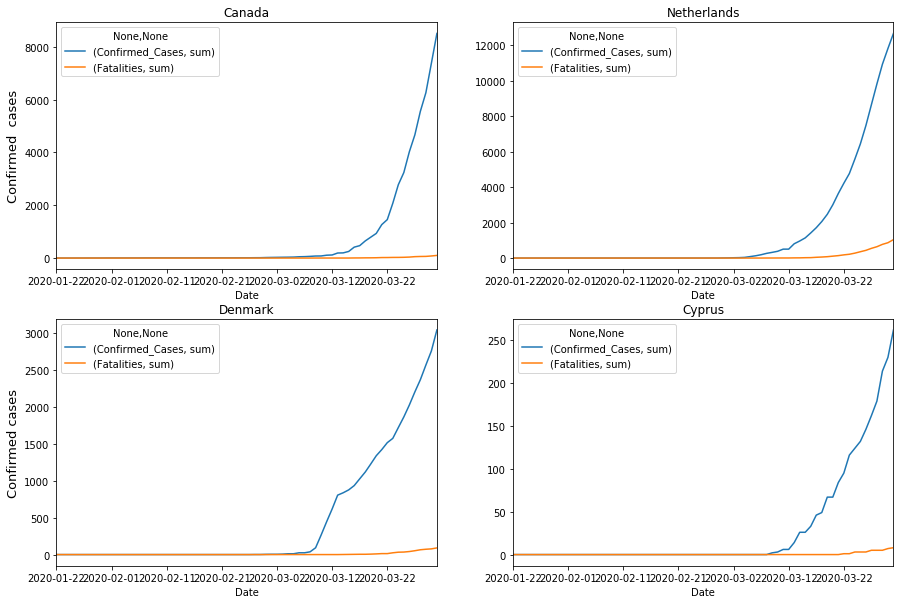

In [30]:
#Canada
ConfirmedCases_date_Canada = df2[df2['Country']=='Canada'].groupby(['Date']).agg({'Confirmed_Cases':['sum']})
fatalities_date_Canada = df2[df2['Country']=='Canada'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Canada = ConfirmedCases_date_Canada.join(fatalities_date_Canada)


#Netherlands
ConfirmedCases_date_Netherlands = df2[df2['Country']=='Netherlands'].groupby(['Date']).agg({'Confirmed_Cases':['sum']})
fatalities_date_Netherlands = df2[df2['Country']=='Netherlands'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Netherlands = ConfirmedCases_date_Netherlands.join(fatalities_date_Netherlands)

#Denmark
ConfirmedCases_date_Denmark = df2[df2['Country']=='Denmark'].groupby(['Date']).agg({'Confirmed_Cases':['sum']})
fatalities_date_Denmark = df2[df2['Country']=='Denmark'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Denmark = ConfirmedCases_date_Denmark.join(fatalities_date_Denmark)
#Australia
ConfirmedCases_date_Cyprus = df2[df2['Country']=='Cyprus'].groupby(['Date']).agg({'Confirmed_Cases':['sum']})
fatalities_date_Cyprus = df2[df2['Country']=='Cyprus'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Cyprus = ConfirmedCases_date_Cyprus.join(fatalities_date_Cyprus)



plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_Canada.plot(ax=plt.gca(), title='Canada')
plt.ylabel("Confirmed  cases", size=13)

plt.subplot(2, 2, 2)
total_date_Netherlands.plot(ax=plt.gca(), title='Netherlands')

plt.subplot(2, 2, 3)
total_date_Denmark.plot(ax=plt.gca(), title='Denmark')
plt.ylabel("Confirmed cases", size=13)

plt.subplot(2, 2, 4)
total_date_Cyprus.plot(ax=plt.gca(), title='Cyprus')

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """


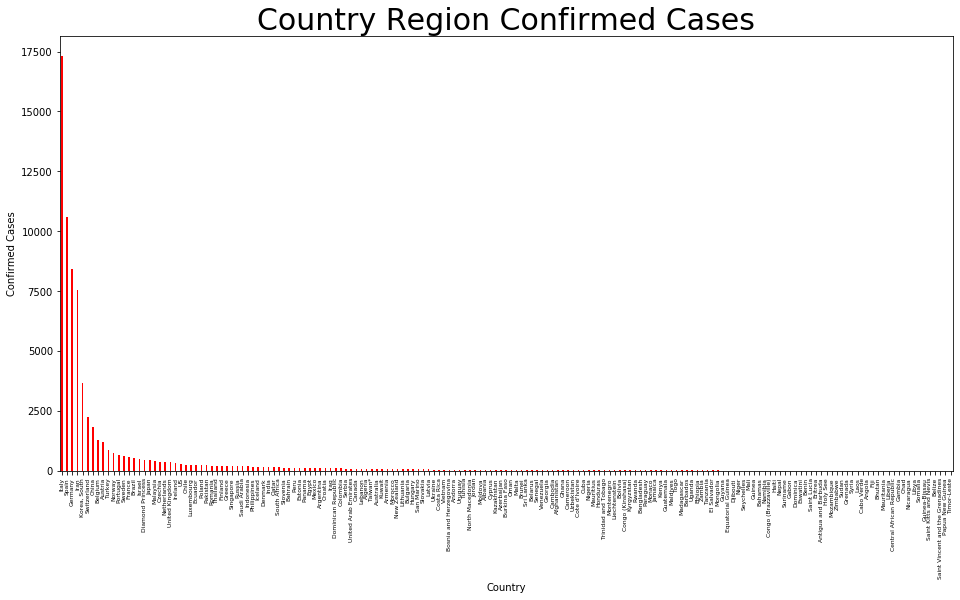

In [31]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
df2.groupby('Country').mean().sort_values(by='Confirmed_Cases',
        ascending=False)['Confirmed_Cases'].plot('bar', color='r',width=0.3,title='Country Region Confirmed Cases',
                                                                                    fontsize=10)
plt.xticks(rotation = 90, fontsize=6)
plt.ylabel('Confirmed Cases')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)

In [32]:
type(df2)

pandas.core.frame.DataFrame

In [33]:
for i in covid_countries:
    ConfirmedCases_date = df2.groupby(['Country','Date']).agg({'Confirmed_Cases':['sum']})
    df_generated_through_loop= pd.DataFrame(ConfirmedCases_date).set_index(pd.Index(range(len(ConfirmedCases_date))))

In [34]:
df_generated_through_loop

,Confirmed_Cases
,sum
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
12105,5.0
12106,7.0
12107,7.0


In [35]:
print(len(ConfirmedCases_date))

12110


In [36]:
df3=df2

In [37]:
df3

,Id,Country,Date,Confirmed_Cases,Fatalities
0,1,Afghanistan,2020-01-22,0.0,0.0
1,2,Afghanistan,2020-01-23,0.0,0.0
2,3,Afghanistan,2020-01-24,0.0,0.0
3,4,Afghanistan,2020-01-25,0.0,0.0
4,5,Afghanistan,2020-01-26,0.0,0.0
...,...,...,...,...,...
20575,29366,Zimbabwe,2020-03-27,5.0,1.0
20576,29367,Zimbabwe,2020-03-28,7.0,1.0
20577,29368,Zimbabwe,2020-03-29,7.0,1.0
20578,29369,Zimbabwe,2020-03-30,7.0,1.0


In [38]:
df3.columns

Index(['Id', 'Country', 'Date', 'Confirmed_Cases', 'Fatalities'], dtype='object')

In [39]:
df4 = df3.groupby(['Country','Date']).sum()

In [40]:
df4 = df4.reset_index()

In [43]:
df4

,Country,Date,Id,Confirmed_Cases,Fatalities
0,Afghanistan,2020-01-22,1,0.0,0.0
1,Afghanistan,2020-01-23,2,0.0,0.0
2,Afghanistan,2020-01-24,3,0.0,0.0
3,Afghanistan,2020-01-25,4,0.0,0.0
4,Afghanistan,2020-01-26,5,0.0,0.0
...,...,...,...,...,...
12105,Zimbabwe,2020-03-27,29366,5.0,1.0
12106,Zimbabwe,2020-03-28,29367,7.0,1.0
12107,Zimbabwe,2020-03-29,29368,7.0,1.0
12108,Zimbabwe,2020-03-30,29369,7.0,1.0


In [44]:
for i in covid_countries:
    ConfirmedCases_date_Canada = df2[df2['Country']==i].groupby(['Date']).agg({'Confirmed_Cases':['sum']})
    fatalities_date_Canada = df2[df2['Country']==i].groupby(['Date']).agg({'Fatalities':['sum']})
    total_date_Canada = ConfirmedCases_date_Canada.join(fatalities_date_Canada)
    print((total_date_Canada))

           Confirmed_Cases Fatalities
                       sum        sum
Date                                 
2020-01-22             0.0        0.0
2020-01-23             0.0        0.0
2020-01-24             0.0        0.0
2020-01-25             0.0        0.0
2020-01-26             0.0        0.0
...                    ...        ...
2020-03-27        101580.0     1578.0
2020-03-28        121326.0     2023.0
2020-03-29        140734.0     2464.0
2020-03-30        161655.0     2975.0
2020-03-31        188018.0     3870.0

[70 rows x 2 columns]
           Confirmed_Cases Fatalities
                       sum        sum
Date                                 
2020-01-22           548.0       17.0
2020-01-23           643.0       18.0
2020-01-24           920.0       26.0
2020-01-25          1406.0       42.0
2020-01-26          2075.0       56.0
...                    ...        ...
2020-03-27         81897.0     3296.0
2020-03-28         81999.0     3299.0
2020-03-29         82122.0 

In [45]:
pd.DataFrame(total_date_Canada)

,Confirmed_Cases,Fatalities
,sum,sum
Date,,
2020-01-22,0.0,0.0
2020-01-23,0.0,0.0
2020-01-24,0.0,0.0
2020-01-25,1.0,0.0
2020-01-26,1.0,0.0
...,...,...
2020-03-27,4.0,0.0
2020-03-28,5.0,0.0
